# Maximizing Revenue for Taxi Drivers through Payment Type Analysis


## Problem Statement
In the fast-paced booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-friven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationships between payment type and fare amount.

## Objective
This projects main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Pyhton hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big differences in the fares for those who pay with credit cards versus those who pay with cash.


## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?


**Importing Libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


**Loading the data**

In [2]:
taxi_data = pd.read_csv('/Users/anjanimalhotra/Downloads/yellow_tripdata_2020-01 (1).csv')

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
taxi_data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [5]:
#Calculating duration from the pickup and dropoff datetime in minutes

#Coverting pickup and dropoff datetime to datetime format
taxi_data['tpep_pickup_datetime']= pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

#Subtracting pickup from dropoff datetime to get duration in minutes
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [6]:
taxi_data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

There are so may columns in the datset, but as per our problem statemnet, we only require some fields from the original data. Rest columns are nothing but the unwanted columns for this study. So, we will simply remove those columns.


As the problem statement is revolving around the payment type, fare amount and any other factors influencing the fare amount, we will filter the data to have only passenger count, trip distance, payment type, fare amount and duration of the trip.

In [7]:
taxi_data= taxi_data[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
taxi_data.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [8]:
# checking for missing values
taxi_data.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [9]:
#Percentage of missing values to total values
print('Missing data % ', round(65441/len(taxi_data)*100, 2))

Missing data %  1.02


In [10]:
# As the percentage of missing values is very less, we can drop the missing values
taxi_data.dropna(inplace = True)

In [11]:
# Changing the data types of passenger_count and payment_type to int64
taxi_data['passenger_count']= taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type']= taxi_data['payment_type'].astype('int64')

In [12]:

# Checking for duplicates
taxi_data[taxi_data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [13]:
# Removing duplicates
taxi_data.drop_duplicates(inplace = True)
taxi_data.shape

(3007861, 5)

In [14]:
# Distribution of passenger count
taxi_data['passenger_count'].value_counts(normalize = True)*100

passenger_count
1    58.198102
2    19.035022
3     6.636011
5     6.293675
6     3.927176
4     3.604621
0     2.303298
7     0.000931
9     0.000598
8     0.000565
Name: proportion, dtype: float64

In [15]:
# Distribution of payment type
taxi_data['payment_type'].value_counts(normalize = True)*100

payment_type
1    67.826705
2    30.757306
3     0.872148
4     0.543808
5     0.000033
Name: proportion, dtype: float64

We will focus solely on payment types "Card" and "Cash" denoted by 1 and 2 in the datset. To ensure our analysis centers on these payment methods, we will filter the data accordingly, excluding all other types.

Moreover, examining the distribution of passengers counts reveals that trips with more than 5 passengers are rare. Accordingly, trips with 0 passengers are impossible, as we expect at least one passenger to pay the fare amount. Therefore, we will filter the passenger count to include only values ranging from 1 to 5.

In [16]:
# filtering payment type  1 and 2 
taxi_data= taxi_data[taxi_data['payment_type'] <3]
# filtering passenger count between 1 to 5
taxi_data= taxi_data[(taxi_data['passenger_count']>0) & (taxi_data['passenger_count']<6)]

In [17]:
# Mapping payment type to Card and Cash
taxi_data['payment_type'].replace({1:'Card', 2:'Cash'}, inplace=True)

In [18]:
taxi_data.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.2,4.800000
1,1,Card,7.0,1.2,7.416667
2,1,Card,6.0,0.6,6.183333
3,1,Card,5.5,0.8,4.850000
4,1,Cash,3.5,0.0,2.300000


In [19]:
# Statistical summary of the data
taxi_data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Upon reviewing the provided statistics, it is evident that the minimum values for trip distance, fare amiunt, and duration are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore, observing the maximum and 50th percentile values, it is possible that the data contains outliers, particularly high values. These outliers need to be addressed nad removed to ensure the fair analysis.

In [20]:
# Removing negative values for fare_amount, trip_distance and duration
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

taxi_data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


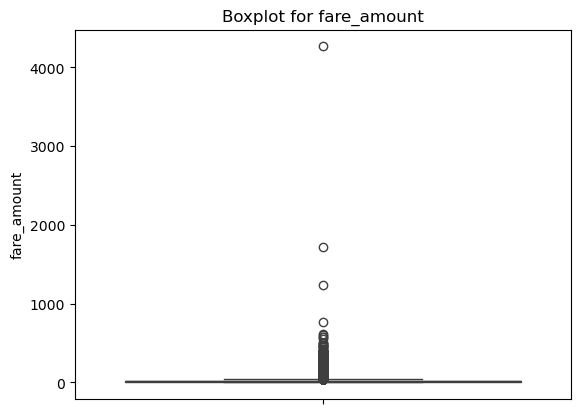

In [21]:
# Visualizing the distribution of fare_amount to check for outliers
sns.boxplot(taxi_data['fare_amount'])
plt.title('Boxplot for fare_amount')
plt.show()

In [22]:
# Removing outliers using IQR method
for col in['fare_amount', 'trip_distance', 'duration']:
    q1 = taxi_data[col].quantile(0.25)
    q3 = taxi_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    taxi_data = taxi_data[(taxi_data[col]>=lower_bound) & (taxi_data[col]<=upper_bound)]

We are interested in exploring the relationship between payment type and passenger behaviour concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amiunts or trip distances?

To study this, we will plot histograms to visualize the distribution of passenger counts paying with either Card or Cash. This will provide stakeholders with insights into fare amount ranges assiciated with different payment methods.

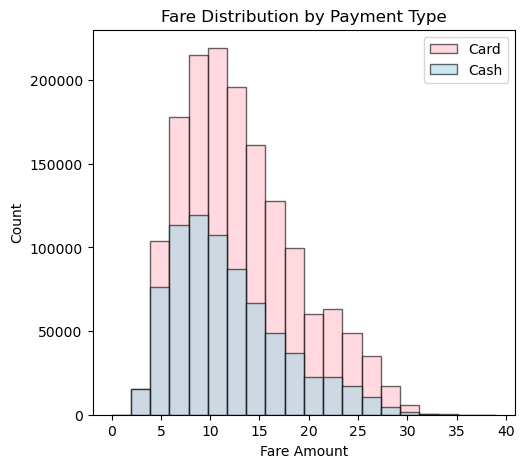

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], bins=20, alpha=0.6, label='Card', edgecolor = 'k',color='pink')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'], bins=20, alpha=0.6, label='Cash', edgecolor = 'k',color='lightblue')
plt.xlabel("Fare Amount")
plt.ylabel("Count")
plt.title("Fare Distribution by Payment Type")
plt.legend()
plt.show()

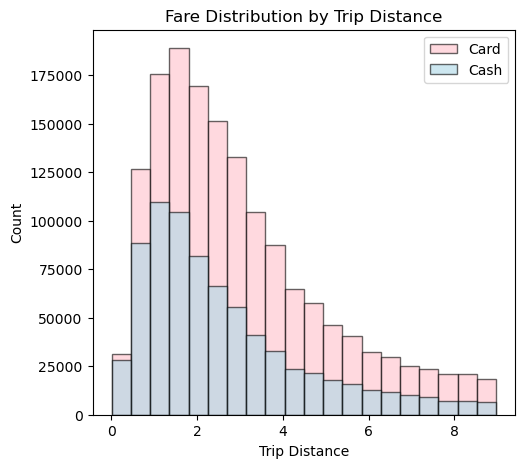

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], bins=20, alpha=0.6, label='Card', edgecolor = 'k',color='pink')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'], bins=20, alpha=0.6, label='Cash', edgecolor = 'k',color='lightblue')
plt.xlabel("Trip Distance")
plt.ylabel("Count")
plt.title("Fare Distribution by Trip Distance")
plt.legend()
plt.show()

In [25]:
# Summary statistics by payment type
taxi_data.groupby('payment_type').agg({
    'fare_amount': ['mean', 'std'],
    'trip_distance': ['mean', 'std']
})


fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

Now, in order to examine the passenger's preference regarding their choice of payment, we will assess the proportion of the two payment types. To provide a visual representation, we will use a pie chart. This graphical depiction will offer a clear understanding between the two payment methods chosen by passengers.

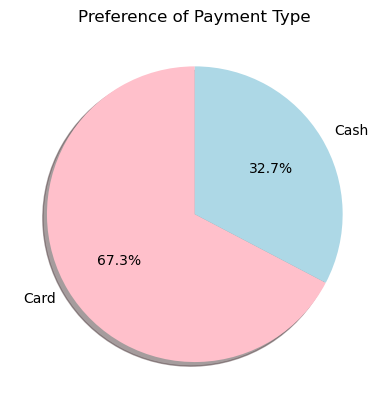

In [26]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(), labels = taxi_data['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['pink', 'lightblue'])
plt.show()

Subsequently, we aim to conduct an anlysis of the payment types in relatiom to the passenger count. Our objective is to study if there are nay chnages in the preference contingent upon the number if passengers travelling in the cab.

To facilitate this, we have employed a visual technique knowm as stacked bar plot. This method is particularly advantageous for comapring the percentage distribution of each paseenger count based on the payment method selected. Through this visual, we can gain insights into potential variations in payment preferences across different passenger counts.

In [27]:
# Analysis of payment type with respect to passenger count
passenger_count = taxi_data.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# Calculating percentage
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


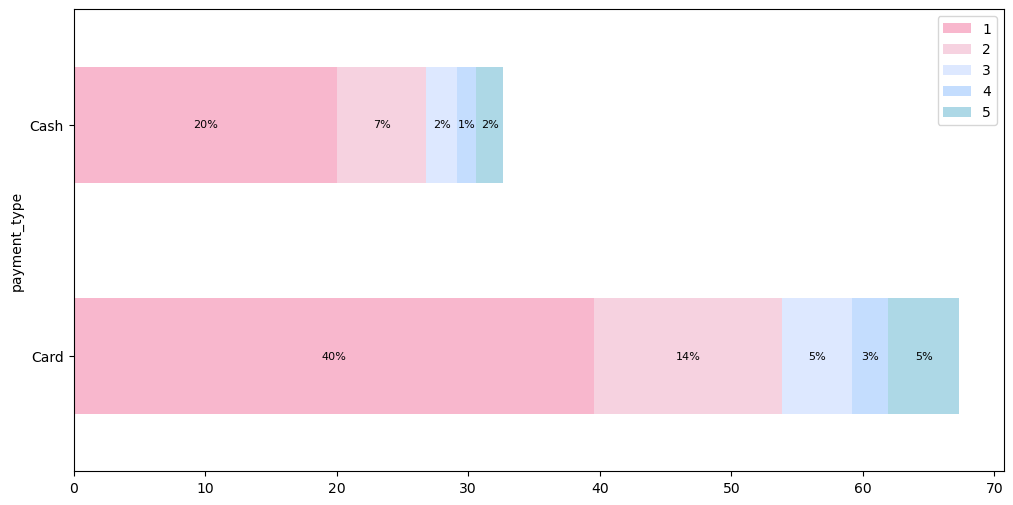

In [28]:
# Creating a dataframe to plot stacked bar plot
df = pd.DataFrame(columns = ['payment_type', 1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

# Plotting stacked bar plot
ax = df.plot(x='payment_type', kind='barh', stacked=True,
            color = ['#F8B7CD', '#F6D2E0', '#DDE8FF', "#C4DDFE", 'lightblue'],
             figsize=(12,6))
# Add percentage labels to each segment of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            ha='center',
            va='center',
            fontsize=8)

## Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amunts adheres to normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generation QQ plot.

Quantile-Quantile (QQ) plots can be used to assess whether the fare amount distribution for each payment type are opproximately normally distributed. If the data points closely allign with the diagonal line in the plot, it suggests that the data follows a normal distribution.

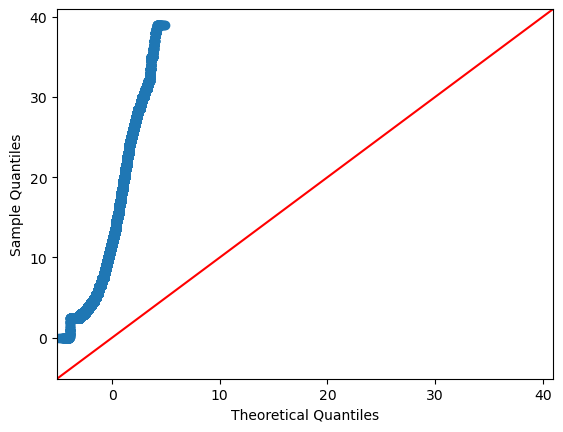

In [38]:
import statsmodels.api as sm
sm.qqplot(taxi_data['fare_amount'], line = '45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z distribution will not be a good test for this. Therefore we will use t-test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is more universally applicable approach for hypothesis testing in may practical research scenarios, including analyses of taxi trip data.

In the analysis of NYC Yellow Taxi Trip Records, where we are dealing with an unknown standard deviation and potentially large datset, the T-test offers a more appropriate and flexible methid for comparing means between two groups( fare amount by payment type). It provides a relaible way to infer about the population, accommodating the incertanity that comes with estimating population parameters from sample data.

**Null Hypothesis:** There is no difference in average fare between customers who use the cards and customers who use cash.

**Alternative Hypothesis:** There is a difference in average fare between customers who use the cards and customers who use cash.

In [39]:
# Sampling fare_amount by payment type
card_sample = taxi_data[taxi_data['payment_type']=='Card']['fare_amount']
cash_sample = taxi_data[taxi_data['payment_type']=='Cash']['fare_amount']

# Performing t-test on both the samples
t_stat, p_value = st.ttest_ind(a = card_sample, b= cash_sample, equal_var = False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Comparing p-value with significance level alpha = 0.05
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in mean fare amounts between Card and Cash payments.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean fare amounts between Card and Cash payments.")
    

T-statistic: 169.2111527245052
P-value: 0.0
Reject the null hypothesis: There is a significant difference in mean fare amounts between Card and Cash payments.


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

The conclusion is that there is statistically significant difference in the average fare amount between customers who use "Card" and customers who use "Cash". The key insight is that encouraging customers to pay with Cards can generate more revenue for taxi can drivers.